# Storytelling Through Data Visualization
## Conditional Plots

In this mission, we learned how the seaborn library lets us quickly style plots and create small multiples using conditions we specify.



| Variable    	| Definition                                 	| Key                                            	|
|-------------	|--------------------------------------------	|------------------------------------------------	|
| PassengerId 	| A numerical id assigned to each passenger  	|                                                	|
| Survived    	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass      	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex         	| Sex                                        	|                                                	|
| Age         	| Age in years                               	|                                                	|
| sibsp       	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch       	| # of parents / children aboard the Titanic 	|                                                	|
| ticket      	| Ticket number                              	|                                                	|
| fare        	| Passenger fare                             	|                                                	|
| cabin       	| Cabin number                               	|                                                	|
| embarked    	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

### Introduction to the Data Set
- Read train.csv into a DataFrame named titanic. Keep only the following columns:

    - "Survived"
    - "Pclass"
    - "Sex"
    - "Age"
    - "SibSp"
    - "Parch"
    - "Fare"
    - "Embarked"
- Use the DataFrame.dropna() method to remove rows containing missing values.

### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Stylistics

In [2]:
%matplotlib inline
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

### Importing the Dataset

In [3]:
titanic = pd.read_csv("../train.csv")
titanic = titanic.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

### Exploring the Dataset

In [4]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Upon observations on the information we get from these methods, we can see that there are some missing values for age. Let's drop these rows since there  is no knowing what their age are.

### Data Cleaning

In [8]:
titanic.dropna(inplace=True)

Using the dropna() method with default values removed the row level observation that has null values. Now we only have 712 rows which is still many.

### Creating Histograms In Seaborn
- Import seaborn as sns and matplotlib.pyplot as plt.
- Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
- Display the plot using plt.show().

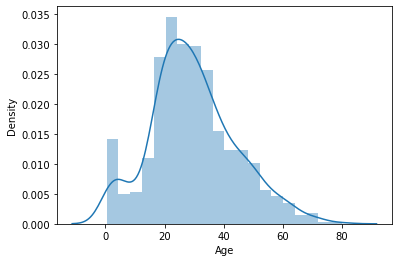

In [9]:
_ = sns.distplot(titanic["Age"])

### Generating A Kernel Density Plot
- Generate a kernel density plot:
    - Using the values in the "Age" column
    - With the area under the curve shaded
- Set the x-axis label to "Age" using pyplot.xlabel().

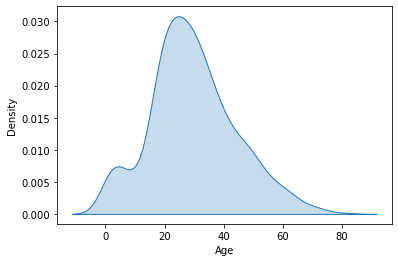

In [10]:
_ = sns.kdeplot(titanic["Age"], shade=True)
_ = plt.xlabel("Age")

### Modifying The Appearance Of The Plots
- Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
- Set the x-axis label to "Age".
- Despine all of the axes.

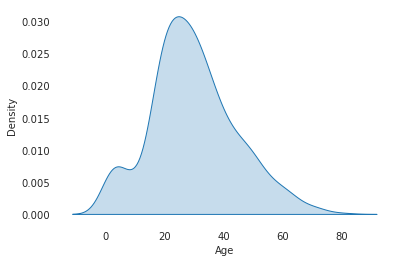

In [11]:
_ = sns.set_style("white")
_ = sns.kdeplot(titanic["Age"], shade=True)
_ = plt.xlabel("Age")
_ = sns.despine(left=True, bottom=True)

### Conditional Distributions Using A Single Condition
- Use a FacetGrid instance to generate three plots on the same row:
    - One for each unique value of Pclass.
    - Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    - Each plot should have a height of 6 inches.
- Remove all of the spines using seaborn.despine().
- Display the plots.

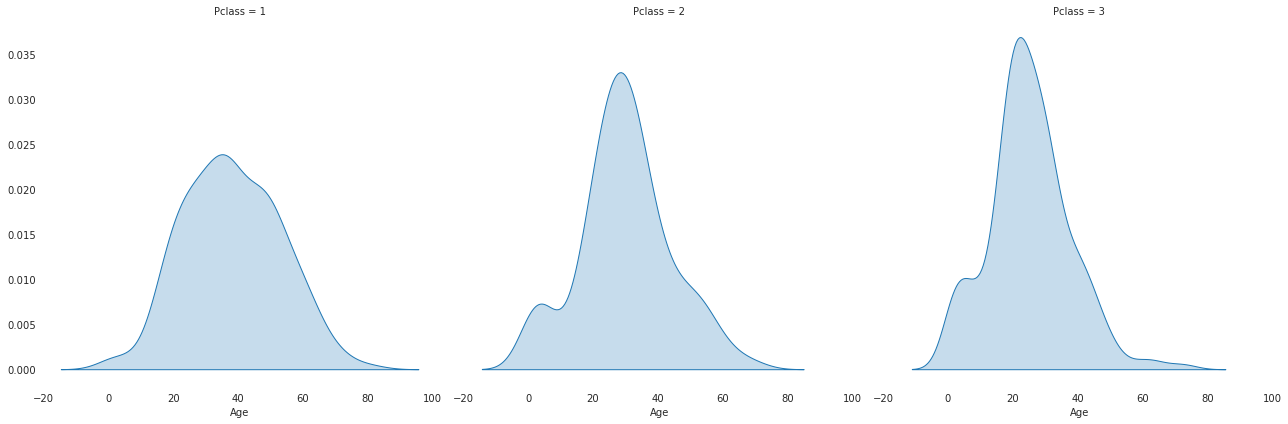

In [12]:
g = sns.FacetGrid(titanic, col="Pclass", height=6)
g.map(sns.kdeplot, "Age", shade=True)
_ = sns.despine(left=True, bottom=True)

/home/prince/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


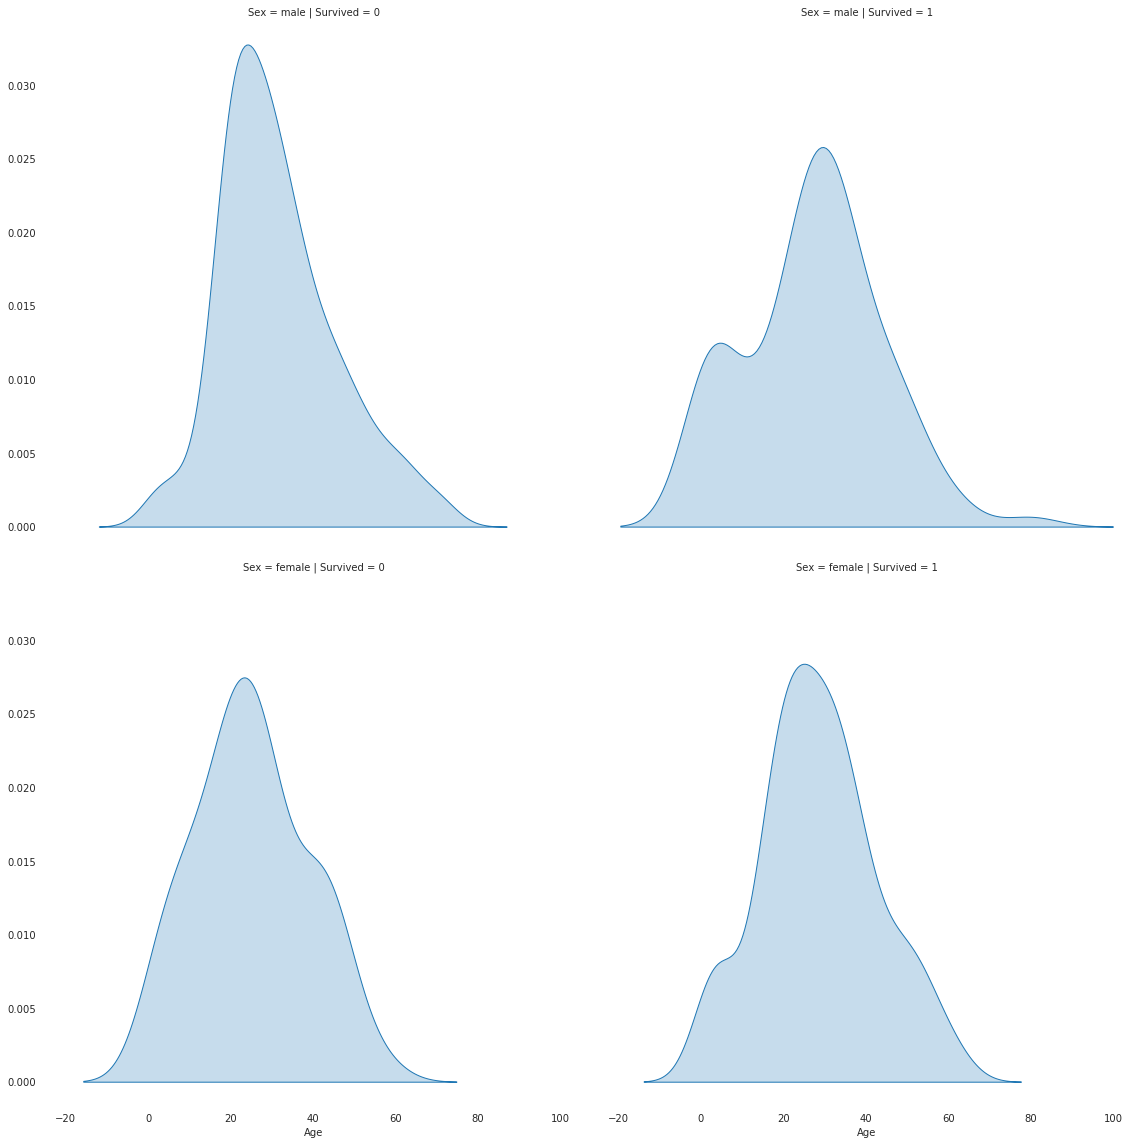

In [13]:
g = sns.FacetGrid(titanic, col="Survived", row="Sex", size=8)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

g = sns.FacetGrid(titanic, col="Survived", row="Sex", size=8)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,0,3,female,39.0,0,5,29.125,Q
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
889,1,1,male,26.0,0,0,30.000,C
890,0,3,male,32.0,0,0,7.750,Q


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [17]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Upon observations on the information we get from these methods, we can see that there are some missing values for age. Let's drop these rows since there  is no knowing what their age are.

### Data Cleaning

In [18]:
titanic.dropna(inplace=True)

Using the dropna() method with default values removed the row level observation that has null values. Now we only have 712 rows which is still many.

### Price After Inflation

In [19]:
titanic["Fare"] = titanic["Fare"] * 13.47

### Creating Histograms In Seaborn
- Import seaborn as sns and matplotlib.pyplot as plt.
- Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
- Display the plot using plt.show().

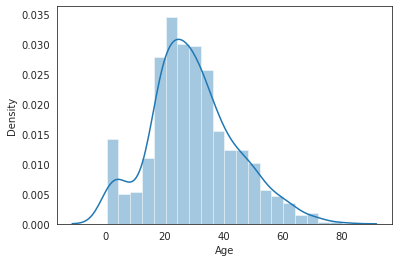

In [20]:
_ = sns.distplot(titanic["Age"])

### Generating A Kernel Density Plot
- Generate a kernel density plot:
    - Using the values in the "Age" column
    - With the area under the curve shaded
- Set the x-axis label to "Age" using pyplot.xlabel().

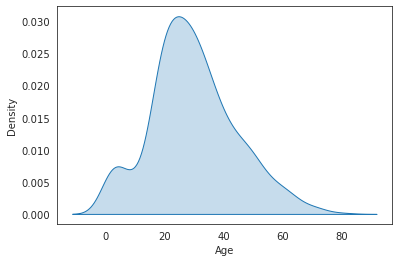

In [21]:
_ = sns.kdeplot(titanic["Age"], shade=True)
_ = plt.xlabel("Age")

### Modifying The Appearance Of The Plots
- Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
- Set the x-axis label to "Age".
- Despine all of the axes.

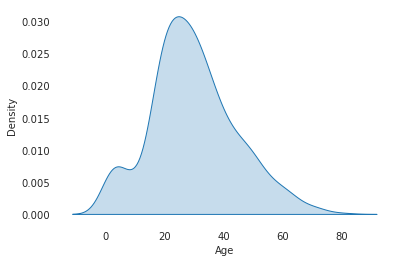

In [22]:
_ = sns.set_style("white")
_ = sns.kdeplot(titanic["Age"], shade=True)
_ = plt.xlabel("Age")
_ = sns.despine(left=True, bottom=True)

### Conditional Distributions Using A Single Condition
- Use a FacetGrid instance to generate three plots on the same row:
    - One for each unique value of Pclass.
    - Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    - Each plot should have a height of 6 inches.
- Remove all of the spines using seaborn.despine().
- Display the plots.

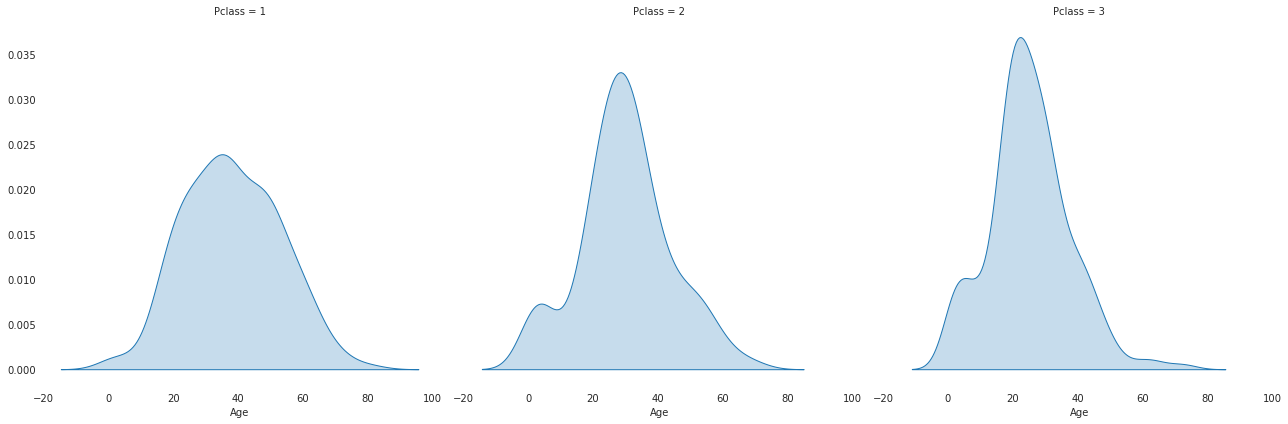

In [23]:
g = sns.FacetGrid(titanic, col="Pclass", height=6)
g.map(sns.kdeplot, "Age", shade=True)
_ = sns.despine(left=True, bottom=True)

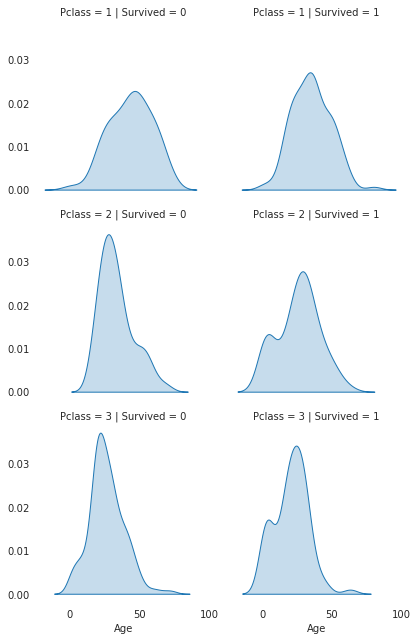

In [24]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

### Creating Conditional Plots Using Three Conditions
- Use a FacetGrid instance to generate a grid of plots using the following conditions:
    - The Survived column across the columns in the grid.
    - The Pclass column across the rows in the grid.
    - The Sex column using different hues.
- Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
- Each plot should have a height of 3 inches.
- Remove all of the spines using seaborn.despine().
- Display the plots.

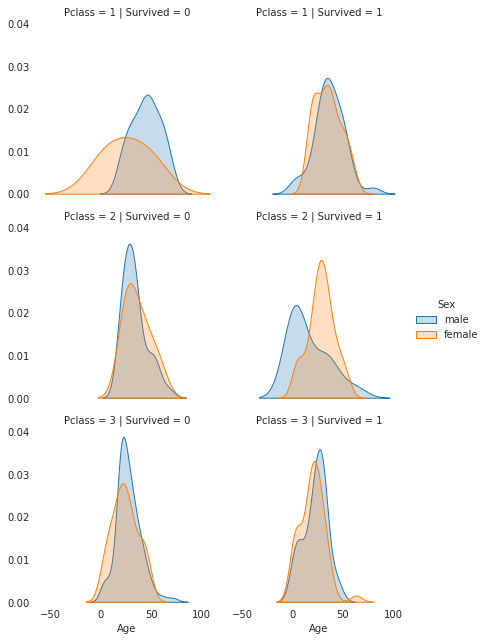

In [25]:
g = sns.FacetGrid(titanic, row="Pclass", col="Survived", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)

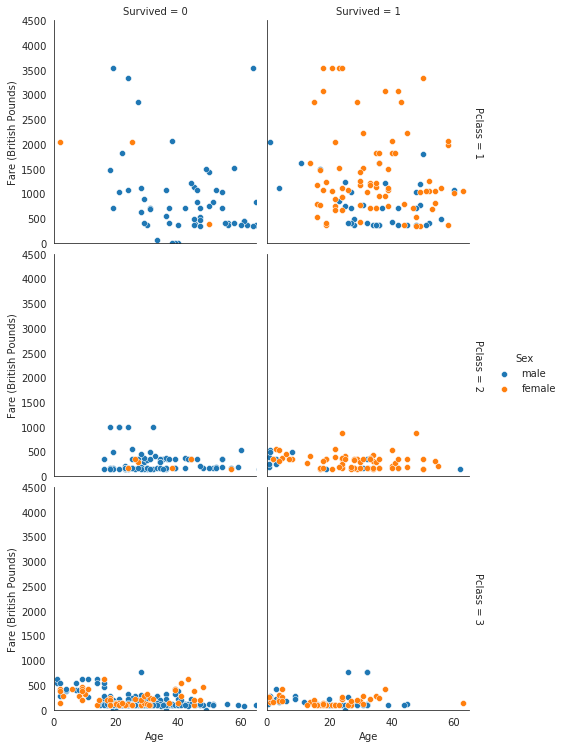

In [52]:
g = sns.FacetGrid(titanic, row="Pclass", col="Survived", hue="Sex", margin_titles=True, height=3.5)
_ = g.map(sns.scatterplot, "Age","Fare")
_ = g.set_axis_labels("Age", "Fare (British Pounds)")
_ = g.set(xlim=(0, 65), ylim=(0, 4500))
_ = g.add_legend()

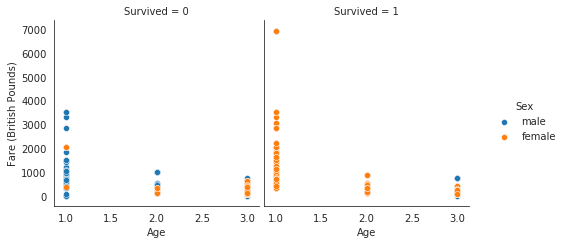

In [57]:
g = sns.FacetGrid(titanic, col="Survived", hue="Sex", margin_titles=True, height=3.5)
_ = g.map(sns.scatterplot, "Pclass","Fare")
_ = g.set_axis_labels("Age", "Fare (British Pounds)")
# _ = g.set(xlim=(0, 65), ylim=(0, 4500))
# _ = g.set(yticks=[0, 50, 100, 150, 200, 250, 300])
_ = g.fig.subplots_adjust(wspace=.02, hspace=.08)
_ = g.add_legend()

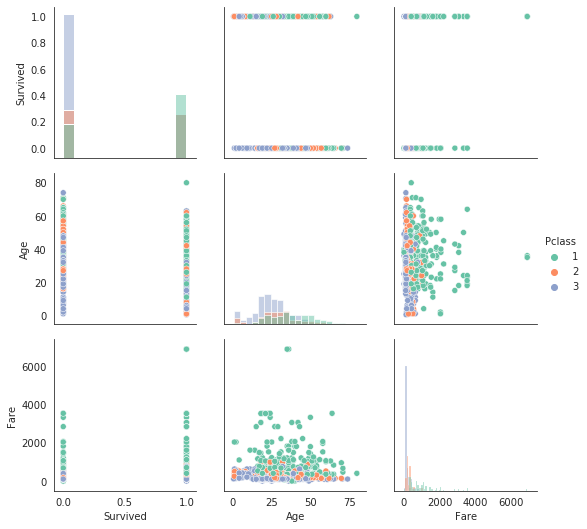

In [56]:
g = sns.PairGrid(titanic[["Survived", "Age", "Fare", "Pclass"]], hue="Pclass", palette="Set2")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()